In [1]:
from stable_baselines3 import DQN
from snake.environment.game_environment import SnakeEnv
from snake.visualisation.state_visualisation import visualize_game_state

In [6]:
from stable_baselines3.common.callbacks import BaseCallback
import numpy as np

class RewardLoggerCallback(BaseCallback):
    def __init__(self, verbose=0):
        super(RewardLoggerCallback, self).__init__(verbose)
        self.episode_rewards = []
        self.episode_lengths = []
        self.all_time_high_score = float('-inf')
        self.metrics = []

    def _on_step(self) -> bool:
        # Access the environment
        info = self.locals.get("infos", [{}])
        if "episode" in info[-1]:
            episode_reward = info[-1]["episode"]["r"]
            episode_length = info[-1]["episode"]["l"]

            # Log rewards and lengths
            self.episode_rewards.append(episode_reward)
            self.episode_lengths.append(episode_length)
            
            # Update all-time high score
            if episode_reward > self.all_time_high_score:
                self.all_time_high_score = episode_reward

            # Compute metrics
            avg_reward = np.mean(self.episode_rewards[-100:])  # Last 100 episodes
            avg_length = np.mean(self.episode_lengths[-100:])
            self.metrics.append({
                "avg_reward": avg_reward,
                "avg_length": avg_length,
                "all_time_high_score": self.all_time_high_score,
            })

        return True

    def get_metrics(self):
        return self.metrics

In [7]:
# create model

env = SnakeEnv()
model = DQN("MlpPolicy", env)


In [ ]:
# train model and log metrics

reward_logger = RewardLoggerCallback()
model.learn(total_timesteps=100000, log_interval=4, callback=reward_logger, progress_bar=True)
metrics = reward_logger.get_metrics()

/project/Snake/venv/lib/python3.9/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for Jupyter 
support
  warnings.warn('install "ipywidgets" for Jupyter support')

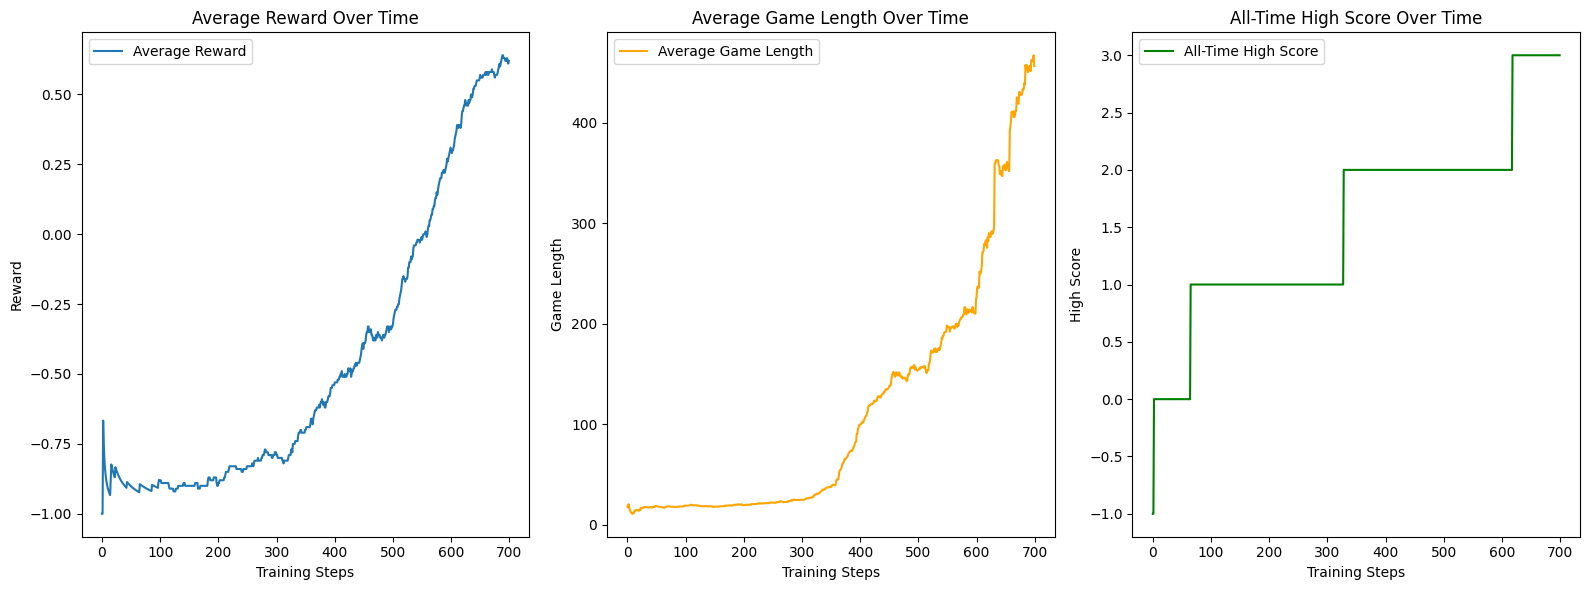

In [48]:
# plot performance metrics

import matplotlib.pyplot as plt

# Extract metrics
avg_rewards = [m["avg_reward"] for m in metrics]
avg_lengths = [m["avg_length"] for m in metrics]
high_scores = [m["all_time_high_score"] for m in metrics]

# Create plots
plt.figure(figsize=(16, 6))

# Average Reward Plot
plt.subplot(1, 3, 1)
plt.plot(avg_rewards, label="Average Reward")
plt.xlabel("Training Steps")
plt.ylabel("Reward")
plt.title("Average Reward Over Time")
plt.legend()

# Average Game Length Plot
plt.subplot(1, 3, 2)
plt.plot(avg_lengths, label="Average Game Length", color="orange")
plt.xlabel("Training Steps")
plt.ylabel("Game Length")
plt.title("Average Game Length Over Time")
plt.legend()

# All-Time High Score Plot
plt.subplot(1, 3, 3)
plt.plot(high_scores, label="All-Time High Score", color="green")
plt.xlabel("Training Steps")
plt.ylabel("High Score")
plt.title("All-Time High Score Over Time")
plt.legend()

plt.tight_layout()
plt.show()

In [1]:
import time

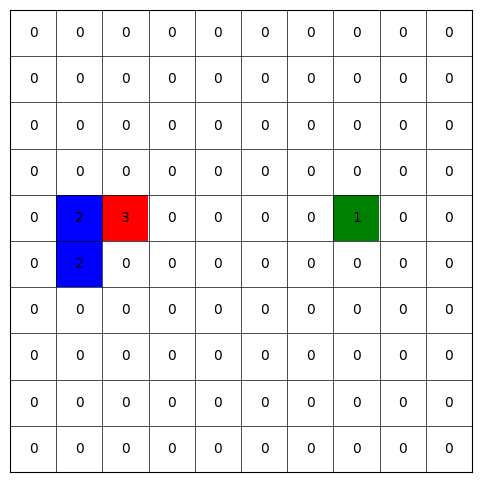

In [3]:
model = DQN.load("/project/Snake/models/dumb_agent")

# Initialize environment and agent
env = SnakeEnv()

# Reset the environment
state, _ = env.reset()

# Loop through some steps
for _ in range(100):
    action = env.action_space.sample()  # Replace with agent's action
    state, reward, done, _, _ = env.step(action)
    
    # Render the environment to visualize the state
    env.render(mode='human')
    
    if done:
        state, _ = env.reset()
        env.render(mode='human')